<a href="https://colab.research.google.com/github/Asakeblessing/Data-Science-Project/blob/main/Machine_learningModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data PreProcessing

In [ ]:
# Libraries Import

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Install Packages

!pip install pandas numpy scikit-learn matplotlib seaborn


Machine Learning Pipepline Using All 3 KPIs for Performance Class/ Independent Of Topsis

In [ ]:
# Create DataFrame for ML
kpi_df = df[['Supplier', 'Cost_Savings', 'Delivery_Duration', 'Defect_Rate_Percent']].copy()


In [ ]:
# Drop rows with missing or invalid KPI values
kpi_df.dropna(subset=['Cost_Savings', 'Delivery_Duration', 'Defect_Rate_Percent'], inplace=True)


Binary Performance label using all 3 KPIs Cost_Savings,Delivery_Duration and Defect_Rate_Percent

In [ ]:
# Define binary performance label
def classify_binary(row):
    return 1 if (
        row['Cost_Savings'] > 3500 and
        row['Delivery_Duration'] < 8 and
        row['Defect_Rate_Percent'] < 7
    ) else 0

# Apply it
kpi_df['Performance_Binary'] = kpi_df.apply(classify_binary, axis=1)


In [ ]:
print(kpi_df.columns)

Index(['Supplier', 'Cost_Savings', 'Delivery_Duration', 'Defect_Rate_Percent',
       'Performance_Binary'],
      dtype='object')


In [ ]:
kpi_df[['Cost_Savings', 'Delivery_Duration', 'Defect_Rate_Percent', 'Performance_Binary']].head()


,Cost_Savings,Delivery_Duration,Defect_Rate_Percent,Performance_Binary
0,2728.32,8,6.360836,0
1,2987.82,10,15.573227,0
2,2957.50,20,4.505495,0
3,5819.52,19,8.333333,0
4,4177.20,12,14.491525,0


Features and Binary Labels

In [ ]:
X = kpi_df[['Cost_Savings', 'Delivery_Duration', 'Defect_Rate_Percent']]
y = kpi_df['Performance_Binary']

Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


Define Regularized Models With Class Balancing

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from collections import Counter

# Calculate ratio for XGBoost class weight
class_counts = Counter(y)
scale_ratio = class_counts[0] / class_counts[1]


ML Model Training with Regularization and Class Weights

In [ ]:
logistic_model = LogisticRegression(
    class_weight='balanced',
    C=0.05,  # Stronger regularization
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    random_state=42
)


rf_model = RandomForestClassifier(
    n_estimators=30,             # Fewer trees to reduce overfitting
    max_depth=2,                 # Very shallow trees (cannot memorize)
    min_samples_leaf=10,         # Prevent learning from noise
    min_samples_split=10,
    max_features='sqrt',         # O use sqrt(n_features) at each split
    bootstrap=True,              # to Ensure sampling randomness
    class_weight='balanced',     # helps Handle class imbalance
    random_state=42
)

xgb_model = XGBClassifier(
    n_estimators=50,            #Balanced number of boosting rounds to learn patters without over fittting
    max_depth=2,                #shallow trees to avoid memorising noise : focus on simple and general rules
    learning_rate=0.01,         #small learning rate to improve stabiility and require more boosting rounds for gradual learning
    subsample=0.6,              #small to increase diversity
    colsample_bytree=0.6,       #reduce overfitting
    reg_lambda=10,             # L2 regularization
    reg_alpha=5,               # L1 regularization
    scale_pos_weight=10,       # Balance class distribution
    eval_metric='logloss',
    random_state=42
)


# Model dictionary
models = {
    "Logistic Regression": logistic_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

Evaluate and Cross - Validation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, scoring='f1_macro', cv=skf)
print("Stratified 5-Fold F1 Macro:", scores.mean())

for name, model in models.items():
    print(f"\n {name} Evaluation")

    # Train  model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion Matrix
    print(" Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Classification Report
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Low', 'High']))

    # Cross-validation F1 macro
    scores = cross_val_score(model, X, y, cv=skf, scoring='f1_macro')
    print(f" Stratified 5-Fold F1 Macro Avg: {scores.mean():.4f}")


Stratified 5-Fold F1 Macro: 0.9791572776672851

 Logistic Regression Evaluation
 Confusion Matrix:
[[128  14]
 [  1  13]]

 Classification Report:
              precision    recall  f1-score   support

         Low       0.99      0.90      0.94       142
        High       0.48      0.93      0.63        14

    accuracy                           0.90       156
   macro avg       0.74      0.91      0.79       156
weighted avg       0.95      0.90      0.92       156

 Stratified 5-Fold F1 Macro Avg: 0.7382

 Random Forest Evaluation
 Confusion Matrix:
[[134   8]
 [  0  14]]

 Classification Report:
              precision    recall  f1-score   support

         Low       1.00      0.94      0.97       142
        High       0.64      1.00      0.78        14

    accuracy                           0.95       156
   macro avg       0.82      0.97      0.87       156
weighted avg       0.97      0.95      0.95       156

 Stratified 5-Fold F1 Macro Avg: 0.8391

 XGBoost Evaluation
 Con

Confusion Matrices

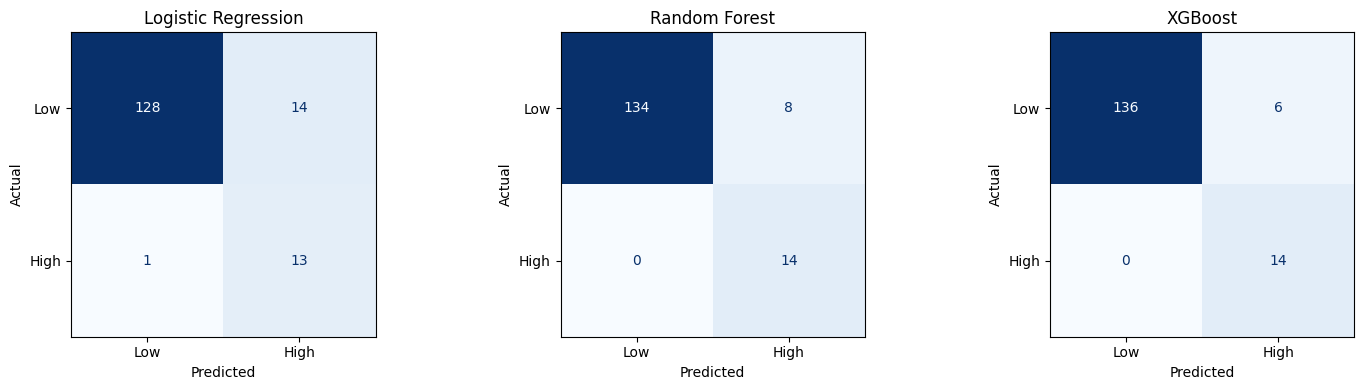

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

#  confusion matrices from evaluations
cm_logistic = np.array([[128, 14],
                        [1, 13]])

cm_rf = np.array([[134, 8],
                  [0, 14]])

cm_xgb = np.array([[136, 6],
                   [0, 14]])

# Model titles
model_titles = ['Logistic Regression', 'Random Forest', 'XGBoost']
cms = [cm_logistic, cm_rf, cm_xgb]

# Plot confusion matrices side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, cm, title in zip(axes, cms, model_titles):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()
